In [23]:
#The entry point to programming Spark with the Dataset and DataFrame API.
from pyspark.sql import SparkSession
spark = (SparkSession.builder.appName("project").config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083").enableHiveSupport().getOrCreate())
    

In [24]:
spark

In [25]:
import pyspark.sql.functions as F                  #List of built-in functions available for DataFrame.
import matplotlib.pyplot as plt                    #plotting the graph

In [26]:
spark.sql("select * from anabig114216.titles").show()

+--------+------------------+
|title_id|             title|
+--------+------------------+
|   e0001|Assistant Engineer|
|   e0002|          Engineer|
|   e0003|   Senior Engineer|
|   e0004|  Technique Leader|
|   m0001|           Manager|
|   s0001|             Staff|
|   s0002|      Senior Staff|
+--------+------------------+



In [27]:
spark.sql("select * from anabig114216.dept_manager").show()

+-------+------+
|dept_no|emp_no|
+-------+------+
|   d001|110022|
|   d001|110039|
|   d002|110085|
|   d002|110114|
|   d003|110183|
|   d003|110228|
|   d004|110303|
|   d004|110344|
|   d004|110386|
|   d004|110420|
|   d005|110511|
|   d005|110567|
|   d006|110725|
|   d006|110765|
|   d006|110800|
|   d006|110854|
|   d007|111035|
|   d007|111133|
|   d008|111400|
|   d008|111534|
+-------+------+
only showing top 20 rows



In [28]:
spark.sql("select * from anabig114216.dept_emp").show()

+------+-------+
|emp_no|dept_no|
+------+-------+
| 10001|   d005|
| 10002|   d007|
| 10003|   d004|
| 10004|   d004|
| 10005|   d003|
| 10006|   d005|
| 10007|   d008|
| 10008|   d005|
| 10009|   d006|
| 10010|   d004|
| 10010|   d006|
| 10011|   d009|
| 10012|   d005|
| 10013|   d003|
| 10014|   d005|
| 10015|   d008|
| 10016|   d007|
| 10017|   d001|
| 10018|   d004|
| 10018|   d005|
+------+-------+
only showing top 20 rows



In [29]:
spark.sql("select * from anabig114216.department").show()

+-------+------------------+
|dept_no|         dept_name|
+-------+------------------+
|   d001|         Marketing|
|   d002|           Finance|
|   d003|   Human Resources|
|   d004|        Production|
|   d005|       development|
|   d006|Quality Management|
|   d007|             Sales|
|   d008|          Research|
|   d009|  Customer Service|
+-------+------------------+



In [30]:
spark.sql("select * from anabig114216.salary").show()

+------+------+
|emp_no|salary|
+------+------+
| 10001| 60117|
| 10002| 65828|
| 10003| 40006|
| 10004| 40054|
| 10005| 78228|
| 10006| 40000|
| 10007| 56724|
| 10008| 46671|
| 10009| 60929|
| 10010| 72488|
| 10011| 42365|
| 10012| 40000|
| 10013| 40000|
| 10014| 46168|
| 10015| 40000|
| 10016| 70889|
| 10017| 71380|
| 10018| 55881|
| 10019| 44276|
| 10020| 40000|
+------+------+
only showing top 20 rows



In [31]:
spark.sql("select * from anabig114216.employees").show(5)

+------+-------------+----------+----------+---------+---+----------+--------------+-----------------------+-----------------+----------+
|emp_no|emp_titles_id|birth_date|first_name|last_name|sex| hire_date|no_of_projects|last_performance_rating|left_organization| last_date|
+------+-------------+----------+----------+---------+---+----------+--------------+-----------------------+-----------------+----------+
|
|
|
|
|
+------+-------------+----------+----------+---------+---+----------+--------------+-----------------------+-----------------+----------+
only showing top 5 rows



In [32]:
#1. A list showing employee number, last name, first name, sex, and salary for each employee1.
spark.sql(
           """SELECT t1.emp_no, t1.last_name, t1.first_name, t1.sex, t2.salary
           FROM anabig114216.employees t1
           JOIN anabig114216.salary  t2
           ON t1.emp_no = t2.emp_no""").show()


+------+-----------+----------+---+------+
|emp_no|  last_name|first_name|sex|salary|
+------+-----------+----------+---+------+
| 10001|    Facello|    Georgi|  M| 60117|
| 10002|     Simmel|   Bezalel|  F| 65828|
| 10003|    Bamford|     Parto|  M| 40006|
| 10004|    Koblick| Chirstian|  M| 40054|
| 10005|   Maliniak|   Kyoichi|  M| 78228|
| 10006|    Preusig|    Anneke|  F| 40000|
| 10007|  Zielinski|   Tzvetan|  F| 56724|
| 10008|   Kalloufi|    Saniya|  M| 46671|
| 10009|       Peac|    Sumant|  F| 60929|
| 10010|   Piveteau| Duangkaew|  F| 72488|
| 10011|      Sluis|      Mary|  F| 42365|
| 10012|  Bridgland|  Patricio|  M| 40000|
| 10013|     Terkki| Eberhardt|  M| 40000|
| 10014|      Genin|     Berni|  M| 46168|
| 10015|  Nooteboom|  Guoxiang|  M| 40000|
| 10016|Cappelletti|  Kazuhito|  M| 70889|
| 10017|  Bouloucos| Cristinel|  F| 71380|
| 10018|       Peha|  Kazuhide|  F| 55881|
| 10019|    Haddadi|   Lillian|  M| 44276|
| 10020|    Warwick|    Mayuko|  M| 40000|
+------+---

In [10]:
# 2.A list showing the manager of each department with the following information: department number, department name,
# the manager's employee number, last name, first name.

spark.sql(
           """SELECT t1.dept_no, t1.dept_name, t2.emp_no, t3.last_name, t3.first_name
           FROM anabig114216.department t1 
           JOIN anabig114216.dept_manager t2
           ON t1.dept_no = t2.dept_no
           JOIN anabig114216.employees t3
           ON t2.emp_no = t3.emp_no""").show()





+-------+------------------+------+------------+-----------+
|dept_no|         dept_name|emp_no|   last_name| first_name|
+-------+------------------+------+------------+-----------+
|   d001|         Marketing|110022|  Markovitch|  Margareta|
|   d001|         Marketing|110039|    Minakawa|   Vishwani|
|   d002|           Finance|110085|       Alpin|       Ebru|
|   d002|           Finance|110114|  Legleitner|      Isamu|
|   d003|   Human Resources|110183|Ossenbruggen|    Shirish|
|   d003|   Human Resources|110228|     Sigstam|    Karsten|
|   d004|        Production|110303|     Wegerle|  Krassimir|
|   d004|        Production|110344|       Cools|     Rosine|
|   d004|        Production|110386|      Kieras|       Shem|
|   d004|        Production|110420|    Ghazalie|      Oscar|
|   d005|       development|110511|    Hagimont|   DeForest|
|   d005|       development|110567|    DasSarma|       Leon|
|   d006|Quality Management|110725|     Onuegbe|  Peternela|
|   d006|Quality Managem

In [13]:
#3.A list showing the department of each employee with the following information: employee number, last name, first name,
#and department name.

spark.sql(
          """SELECT t1.emp_no, t2.last_name, t2.first_name, t3.dept_name
          FROM anabig114216.dept_emp t1
          JOIN anabig114216.employees t2
          ON t1.emp_no = t2.emp_no
          JOIN anabig114216.department t3
          ON t1.dept_no = t3.dept_no""").show()


+------+-----------+----------+------------------+
|emp_no|  last_name|first_name|         dept_name|
+------+-----------+----------+------------------+
| 10001|    Facello|    Georgi|       development|
| 10002|     Simmel|   Bezalel|             Sales|
| 10003|    Bamford|     Parto|        Production|
| 10004|    Koblick| Chirstian|        Production|
| 10005|   Maliniak|   Kyoichi|   Human Resources|
| 10006|    Preusig|    Anneke|       development|
| 10007|  Zielinski|   Tzvetan|          Research|
| 10008|   Kalloufi|    Saniya|       development|
| 10009|       Peac|    Sumant|Quality Management|
| 10010|   Piveteau| Duangkaew|Quality Management|
| 10010|   Piveteau| Duangkaew|        Production|
| 10011|      Sluis|      Mary|  Customer Service|
| 10012|  Bridgland|  Patricio|       development|
| 10013|     Terkki| Eberhardt|   Human Resources|
| 10014|      Genin|     Berni|       development|
| 10015|  Nooteboom|  Guoxiang|          Research|
| 10016|Cappelletti|  Kazuhito|

In [62]:
#4. A list showing first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B".

spark.sql(
          """SELECT first_name, last_name,sex
          FROM anabig114216.employees
          WHERE first_name = 'Hercules' AND last_name Like 'B%' """).show()


+----------+-------------+---+
|first_name|    last_name|sex|
+----------+-------------+---+
|  Hercules|   Benzmuller|  M|
|  Hercules|      Brendel|  F|
|  Hercules|   Baranowski|  M|
|  Hercules|     Barreiro|  M|
|  Hercules|         Baer|  M|
|  Hercules|Bernardinello|  F|
|  Hercules|      Basagni|  M|
|  Hercules|        Biran|  F|
|  Hercules|    Bernatsky|  M|
|  Hercules|         Bail|  F|
|  Hercules|        Birge|  F|
|  Hercules|      Bisiani|  F|
|  Hercules|       Bodoff|  M|
|  Hercules|        Biron|  F|
|  Hercules|      Buchter|  M|
|  Hercules|         Bain|  F|
|  Hercules|         Bahr|  M|
|  Hercules|         Baak|  M|
|  Hercules|     Benantar|  F|
|  Hercules|      Berstel|  F|
+----------+-------------+---+



In [14]:
#5. A list showing all employees in the Sales department, including their employee number, last name, first name, and
#department name.
spark.sql (
           """SELECT t3.dept_name, t2.emp_no,t2.last_name, t2.first_name
            FROM anabig114216.dept_emp t1
           JOIN anabig114216.employees t2
           ON t1.emp_no = t2.emp_no
           JOIN anabig114216.department t3
           ON t1.dept_no = t3.dept_no
           WHERE t3.dept_name = 'Sales' """).show()

+---------+------+------------+----------+
|dept_name|emp_no|   last_name|first_name|
+---------+------+------------+----------+
|    Sales| 10002|      Simmel|   Bezalel|
|    Sales| 10016| Cappelletti|  Kazuhito|
|    Sales| 10034|        Swan|     Bader|
|    Sales| 10041|      Lenart|       Uri|
|    Sales| 10050|      Dredge|   Yinghua|
|    Sales| 10053|    Zschoche|    Sanjiv|
|    Sales| 10060| Billingsley|  Breannda|
|    Sales| 10061|      Herber|       Tse|
|    Sales| 10068|     Brattka|  Charlene|
|    Sales| 10087|     Eugenio|   Xinglin|
|    Sales| 10088|    Syrzycki|  Jungsoon|
|    Sales| 10089|Flasterstein| Sudharsan|
|    Sales| 10093|     Desikan|   Sailaja|
|    Sales| 10095|      Morton|    Hilari|
|    Sales| 10099|     Sullins|    Valter|
|    Sales| 10101|      Heyers|     Perla|
|    Sales| 10107|        Baca|      Dung|
|    Sales| 10125|     Hiltgen|     Syozo|
|    Sales| 10136|    Pintelas|    Zissis|
|    Sales| 10148|       Azumi|    Douadi|
+---------+

In [64]:
#6. A list showing all employees in the Sales and Development departments, including their employee number, last name,
#first name, and department name.
spark.sql(
          """SELECT t1.emp_no,t1.last_name,t1.first_name,t3.dept_name
            from anabig114216.employees t1
            JOIN anabig114216.dept_emp t2
            ON t1.emp_no = t2.emp_no
            JOIN anabig114216.department t3
            ON t2.dept_no = t3.dept_no
            WHERE t3.dept_name = 'Sales' OR t3.dept_name = 'development' """).show()

+------+-----------+----------+-----------+
|emp_no|  last_name|first_name|  dept_name|
+------+-----------+----------+-----------+
| 10001|    Facello|    Georgi|development|
| 10002|     Simmel|   Bezalel|      Sales|
| 10006|    Preusig|    Anneke|development|
| 10008|   Kalloufi|    Saniya|development|
| 10012|  Bridgland|  Patricio|development|
| 10014|      Genin|     Berni|development|
| 10016|Cappelletti|  Kazuhito|      Sales|
| 10018|       Peha|  Kazuhide|development|
| 10021|       Erde|     Ramzi|development|
| 10022|     Famili|    Shahaf|development|
| 10023| Montemayor|     Bojan|development|
| 10025|     Heyers| Prasadram|development|
| 10027|    Reistad|    Divier|development|
| 10028|   Tempesti|  Domenick|development|
| 10031|     Joslin|   Karsten|development|
| 10034|       Swan|     Bader|      Sales|
| 10037|   Makrucki|   Pradeep|development|
| 10040|    Meriste|     Weiyi|development|
| 10041|     Lenart|       Uri|      Sales|
| 10043|    Tzvieli|    Yishay|d

In [15]:
#7. A list showing the frequency count of employee last names, in descending order.
#( i.e., how many employees share each last name
spark.sql(
         """SELECT last_name,COUNT(last_name) AS Frequency_Count
            FROM anabig114216.employees
            GROUP BY last_name
            ORDER BY
            FREQUENCY_Count DESC""").show()

+-----------+---------------+
|  last_name|Frequency_Count|
+-----------+---------------+
|       Baba|            226|
|      Coorg|            223|
|     Gelosh|            223|
|    Sudbeck|            222|
|     Farris|            222|
|     Adachi|            221|
|     Osgood|            220|
|     Masada|            218|
|     Neiman|            218|
|    Mandell|            218|
|Boudaillier|            217|
|    Wendorf|            217|
|     Pettis|            216|
|    Solares|            216|
|     Mahnke|            216|
|   Cummings|            216|
|   Collette|            215|
|   Birjandi|            215|
|     Emmart|            215|
|    Kulisch|            215|
+-----------+---------------+
only showing top 20 rows



In [17]:
# 8. Histogram to show the salary distribution among the employees
salary_distribution =spark.sql(
            """SELECT salary_range,count(salary_range) as salaries
            from anabig114216.bin
            GROUP BY salary_range
            ORDER BY salaries DESC""")

In [19]:
salary_distribution.show()

+-------------+--------+
| salary_range|salaries|
+-------------+--------+
|  40000-60000|  216380|
|  60000-80000|   66227|
| 80000-100000|   16129|
|100000-120000|    1264|
|120000-140000|      24|
+-------------+--------+



In [20]:
salary_distribution = salary_distribution.toPandas()                #converting to pandas dataframe

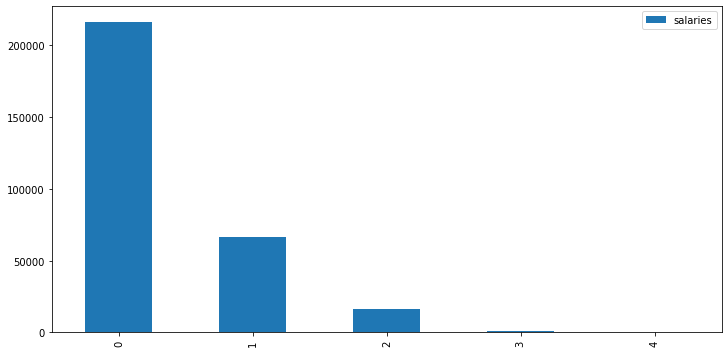

In [23]:
salary_distribution.plot(kind='bar',figsize=(12,6))                 #plotting bargraph

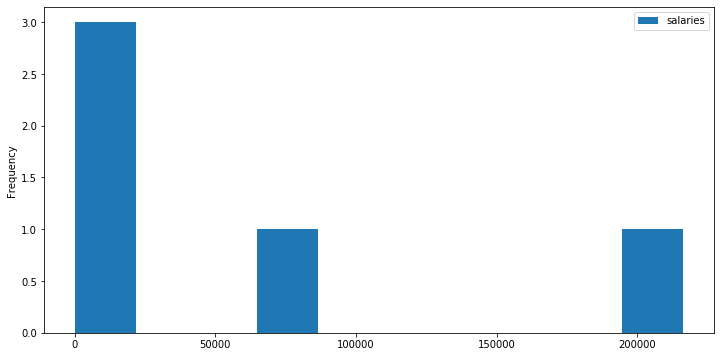

In [24]:
salary_distribution.plot(kind='hist',figsize=(12,6))                     #plotting histogram for salary distribution

In [25]:
# 9. Bar graph to show the Average salary per title (designation)

avg_salary=spark.sql(
            """select t3.title, AVG(t1.salary) as avg_salary
            from anabig114216.salary t1
            join anabig114216.employees t2
            on t1.emp_no = t2.emp_no
            join anabig114216.titles t3
            on t2.emp_titles_id =t3.title_id
            group by t3.title""")

In [26]:
avg_salary.show()

+------------------+------------------+
|             title|        avg_salary|
+------------------+------------------+
|             Staff| 58465.38285033152|
|Assistant Engineer| 48564.43444730077|
|      Senior Staff| 58550.17270435993|
|   Senior Engineer| 48506.79987109579|
|          Engineer|48535.336511426336|
|           Manager|51531.041666666664|
|  Technique Leader| 48582.89609189332|
+------------------+------------------+



In [27]:
avg_salary = avg_salary.toPandas()                              #converting into pandas dataframe

In [28]:
avg_salary.head()

,title,avg_salary
0,Staff,58465.382850
1,Assistant Engineer,48564.434447
2,Senior Staff,58550.172704
3,Senior Engineer,48506.799871
4,Engineer,48535.336511


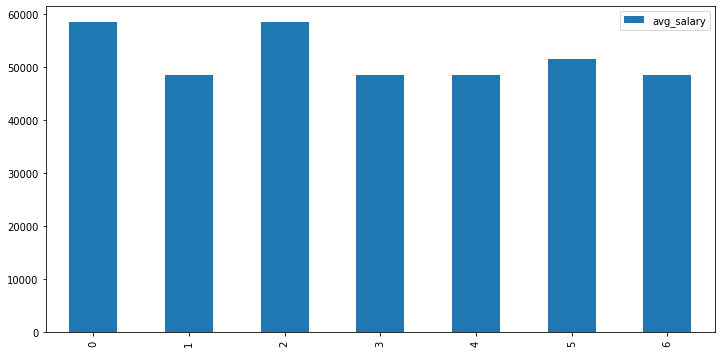

In [29]:
avg_salary.plot(kind='bar',figsize=(12,6))                      #plotting bar graph

In [33]:
# Top 10 employees whose average salary is greater than 100000
spark.sql(
            """select AVG(t1.salary) as average_salary,t2.emp_no,t2.first_name
            from salary t1
            join employees t2
            on t1.emp_no = t2.emp_no
            group by t2.emp_no,t2.first_name
            order by average_salary desc limit 10""").show()

+--------------+------+----------+
|average_salary|emp_no|first_name|
+--------------+------+----------+
|      129492.0|205000|  Charmane|
|      127238.0| 44188|   Slavian|
|      127041.0|444756|     Nahid|
|      126703.0|458302|    Poorav|
|      125469.0| 37558| Juichirou|
|      124357.0|296857|   Toshimo|
|      123749.0| 20004|  Radoslaw|
|      123668.0|109334|   Tsutomu|
|      123477.0|474456|   Martine|
|      122726.0|474684|  Chinhyun|
+--------------+------+----------+



In [34]:
#provide employee details and depart details whose employee firstname starts with 'Be'
spark.sql(
            """select t3.dept_name,t3.dept_no,t1.emp_no,t1.first_name
            from employees t1
            join dept_emp t2
            on t1.emp_no = t2.emp_no
            join departments t3
            on t3.dept_no=t2.dept_no
            where first_name like 'Be%' """).show()

+------------------+-------+------+----------+
|         dept_name|dept_no|emp_no|first_name|
+------------------+-------+------+----------+
|           "Sales"|   d007| 10002|   Bezalel|
|     "development"|   d005| 10014|     Berni|
|       "Marketing"|   d001| 10058|   Berhard|
|           "Sales"|   d007| 10270|     Bedir|
|           "Sales"|   d007| 10304|     Bernt|
|     "development"|   d005| 10324|  Bernardo|
|     "development"|   d005| 10549|    Beshir|
|     "development"|   d005| 10587|   Behnaam|
|      "Production"|   d004| 10630|   Bezalel|
|"Customer Service"|   d009| 10682|     Bedir|
|"Customer Service"|   d009| 10693|   Berhard|
|"Customer Service"|   d009| 10721|     Bernd|
|           "Sales"|   d007| 10770|     Bedir|
|      "Production"|   d004| 10812|  Berthier|
|     "development"|   d005| 10842|     Berni|
|     "development"|   d005| 10943|     Berna|
|     "development"|   d005| 11018|  Berthier|
|     "development"|   d005| 11078|    Beshir|
|        "Res

In [39]:
#Retrieve the details of employees whose designation is Manager

spark.sql(
            """Select t1.first_name,t1.last_name,t2.title,t1.emp_no
            from employees t1
            Join titles t2
            on t1.emp_titles_id = t2.title_id
            where t2.title like 'Manager' """).show()

+-----------+------------+-------+------+
| first_name|   last_name|  title|emp_no|
+-----------+------------+-------+------+
|  Margareta|  Markovitch|Manager|110022|
|   Vishwani|    Minakawa|Manager|110039|
|       Ebru|       Alpin|Manager|110085|
|      Isamu|  Legleitner|Manager|110114|
|    Shirish|Ossenbruggen|Manager|110183|
|    Karsten|     Sigstam|Manager|110228|
|  Krassimir|     Wegerle|Manager|110303|
|     Rosine|       Cools|Manager|110344|
|       Shem|      Kieras|Manager|110386|
|      Oscar|    Ghazalie|Manager|110420|
|   DeForest|    Hagimont|Manager|110511|
|       Leon|    DasSarma|Manager|110567|
|  Peternela|     Onuegbe|Manager|110725|
|     Rutger|     Hofmeyr|Manager|110765|
|     Sanjoy|     Quadeer|Manager|110800|
|       Dung|       Pesch|Manager|110854|
|Przemyslawa|   Kaelbling|Manager|111035|
|      Hauke|       Zhang|Manager|111133|
|       Arie|     Staelin|Manager|111400|
|     Hilary|      Kambil|Manager|111534|
+-----------+------------+-------+

In [40]:
#find average,minimum,maximum salary of employees.
spark.sql(
            """Select avg(salary) avg_salary,min(salary) min_salary,max(salary) max_salary
                from salary
                order by avg_salary,min_salary,max_salary""").show()

+------------------+----------+----------+
|        avg_salary|min_salary|max_salary|
+------------------+----------+----------+
|52970.732451403885|     40000|    129492|
+------------------+----------+----------+



In [44]:
#list of showing employees whose salary is between 40000 and 50000
spark.sql(
            """select t1.emp_no,t1.first_name,t2.salary
            from employees t1
            join salary t2
            on t1.emp_no=t2.emp_no
            where t2.salary between '40000' and '50000'""").show()

+------+----------+------+
|emp_no|first_name|salary|
+------+----------+------+
| 10003|     Parto| 40006|
| 10004| Chirstian| 40054|
| 10006|    Anneke| 40000|
| 10008|    Saniya| 46671|
| 10011|      Mary| 42365|
| 10012|  Patricio| 40000|
| 10013| Eberhardt| 40000|
| 10014|     Berni| 46168|
| 10015|  Guoxiang| 40000|
| 10019|   Lillian| 44276|
| 10020|    Mayuko| 40000|
| 10022|    Shahaf| 40000|
| 10023|     Bojan| 47883|
| 10025| Prasadram| 40000|
| 10026|  Yongqiao| 47585|
| 10027|    Divier| 40000|
| 10028|  Domenick| 48859|
| 10031|   Karsten| 40000|
| 10032|     Jeong| 48426|
| 10034|     Bader| 47561|
+------+----------+------+
only showing top 20 rows

